In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_histogram
from math import pi, sqrt

In [6]:
from matplotlib import pyplot as plt

In [3]:
qc = QuantumCircuit(1)

In [4]:
init_st = [1/sqrt(2), 1j/sqrt(2)]
qc.initialize(init_st, 0)
qc.draw()

┌──────────────────────────────┐
q: ┤ Initialize(0.70711,0.70711j) ├
   └──────────────────────────────┘

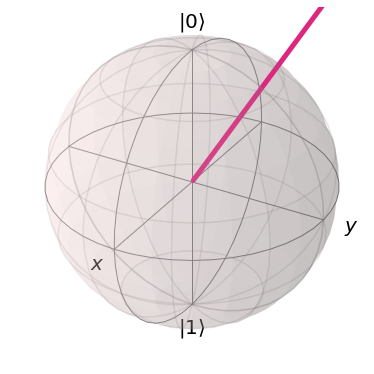

In [5]:
%matplotlib inline
plot_bloch_vector([1,2,3])

In [6]:
qc.save_statevector()
simulator = Aer.get_backend('qasm_simulator')

AttributeError: 'QuantumCircuit' object has no attribute 'save_statevector'

In [14]:
q = assemble(qc)

job = simulator.run(q)

In [15]:
job

In [16]:
results = job.result()

In [21]:
type(results)

qiskit.result.result.Result

In [22]:
results.get_statevector()

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


In [23]:
qc.measure_all()
qc.draw()

┌──────────────────────────────┐ statevector  ░ ┌─┐
   q: ┤ Initialize(0.70711,0.70711j) ├──────░───────░─┤M├
      └──────────────────────────────┘      ░       ░ └╥┘
meas: ═════════════════════════════════════════════════╩═

In [24]:
counts = results.get_counts()

In [25]:
counts  # Since the state is in an equal superposition of both |0> and |1> states, we'll get a 50-50% of both the counts

{'0': 0.5, '1': 0.5}

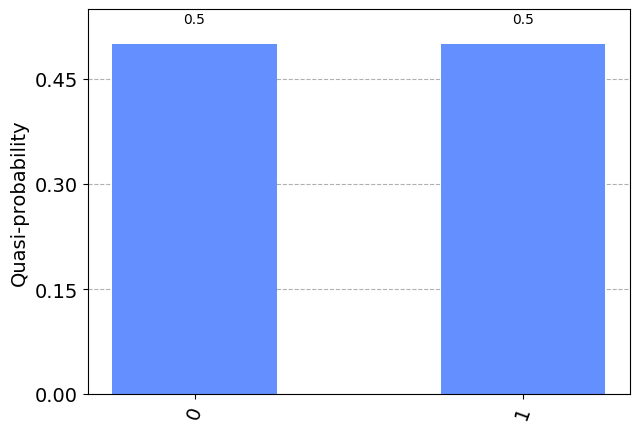

In [26]:
plot_histogram(counts)

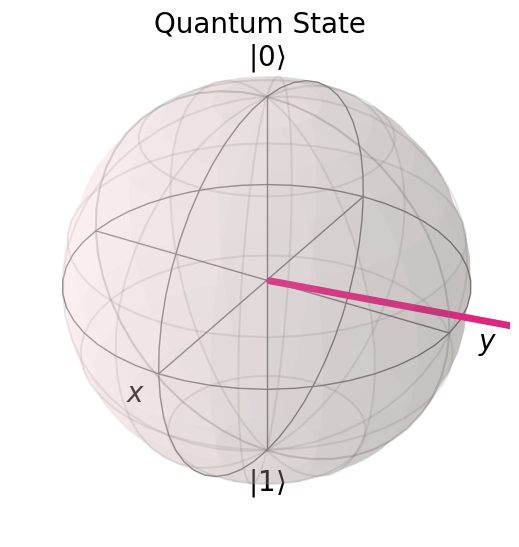

In [27]:
plot_bloch_vector([-1,4,-0.2], title='Quantum State', figsize=(5,5), coord_type='Cartesian')

In [28]:
qc1 = QuantumCircuit(1)

In [30]:
qc1.x(0)
qc1.draw()

┌───┐
q: ┤ X ├
   └───┘

In [31]:
sim = Aer.get_backend('aer_simulator')

In [32]:
qobj= assemble(qc1)
job = sim.run(qobj)
res = job.result()
print(res)

Result(backend_name='aer_simulator', backend_version='0.11.0', qobj_id='91f627dd-8143-4bef-83a0-5406361bfff9', job_id='08c632e0-8441-4e99-b8ad-0c7302b44a7d', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(), header=QobjExperimentHeader(clbit_labels=[], creg_sizes=[], global_phase=0.0, memory_slots=0, metadata={}, n_qubits=1, name='circuit-89', qreg_sizes=[['q', 1]], qubit_labels=[['q', 0]]), status=DONE, seed_simulator=4055975333, metadata={'batched_shots_optimization': False, 'method': 'stabilizer', 'active_input_qubits': [], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 0, 'num_clbits': 0, 'input_qubit_map': [], 'measure_sampling': False, 'parallel_shots': 1, 'parallel_state_update': 4}, time_taken=1.73e-05)], date=2022-10-20T20:17:53.740697, status=COMPLETED, header=None, metadata={'parallel_experiments': 1, 'omp_enabled': True, 'max_memory_mb': 7995, 'max_gpu_memory_mb': 0, 'num_processes_per_experiments': 1, 'ti

In [36]:
qc1.measure_all()
qc1.draw()
# res.get_counts()

┌───┐ ░ ┌─┐ ░ ┌─┐
    q: ┤ X ├─░─┤M├─░─┤M├
       └───┘ ░ └╥┘ ░ └╥┘
 meas: ═════════╩═════╬═
                      ║ 
meas0: ═══════════════╩═

In [2]:
import qiskit
qiskit.__version__

'0.21.2'